In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

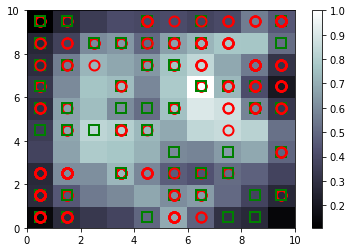

In [8]:

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [9]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [10]:
frauds

array([[  1.56614120e+07,   1.00000000e+00,   4.87500000e+01,
          8.50000000e+00,   2.00000000e+00,   8.00000000e+00,
          8.00000000e+00,   1.25000000e+01,   1.00000000e+00,
          1.00000000e+00,   9.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.81000000e+02,   1.65600000e+03],
       [  1.55898810e+07,   1.00000000e+00,   2.89200000e+01,
          1.50000000e+01,   2.00000000e+00,   8.00000000e+00,
          8.00000000e+00,   5.33500000e+00,   1.00000000e+00,
          1.00000000e+00,   1.10000000e+01,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.28400000e+03],
       [  1.56225070e+07,   1.00000000e+00,   2.39200000e+01,
          1.50000000e+00,   2.00000000e+00,   2.00000000e+00,
          8.00000000e+00,   1.87500000e+00,   1.00000000e+00,
          1.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+02,   3.28000000e+02],
       [  1.56628540e+07,   0.00000000e+00,   2.95800000e+01,
     